# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

Drop columns with low correlation in relation to the label

In [4]:
data_dt = data.copy()
data_dt.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['state'],axis=1)
y = data_dt['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [6]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


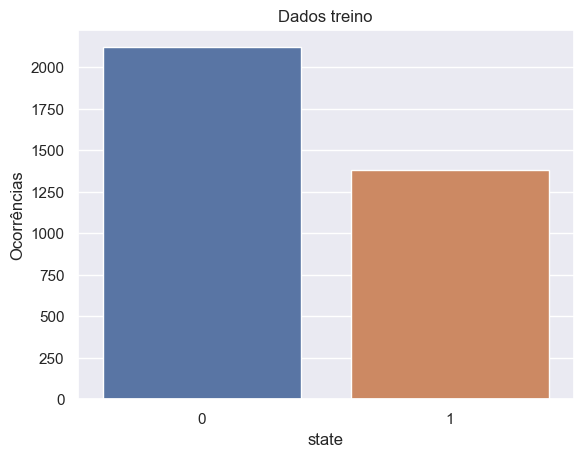

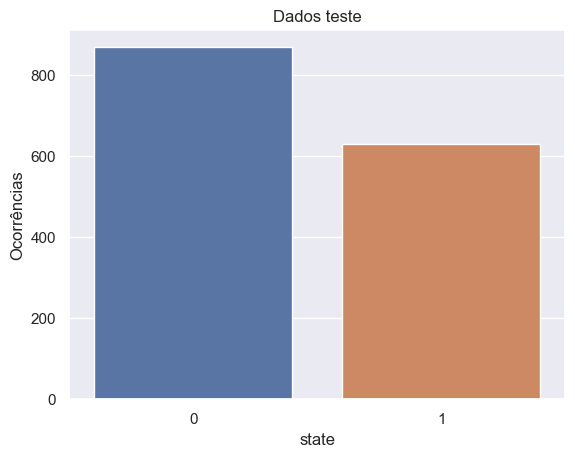

In [7]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [20]:
model_dt = DecisionTreeClassifier(random_state=random)
model_dt.fit(X_train,y_train)
predictions = model_dt.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(roc_auc_score(y_test,predictions))
print(f1_score(y_test,predictions))
print(fbeta_score(y_test,predictions,beta=0.25))

[[697 172]
 [160 471]]
0.7786666666666666
0.7325038880248833
0.7464342313787639
0.7742527888769539
0.7394034536891678
0.7333089110724424


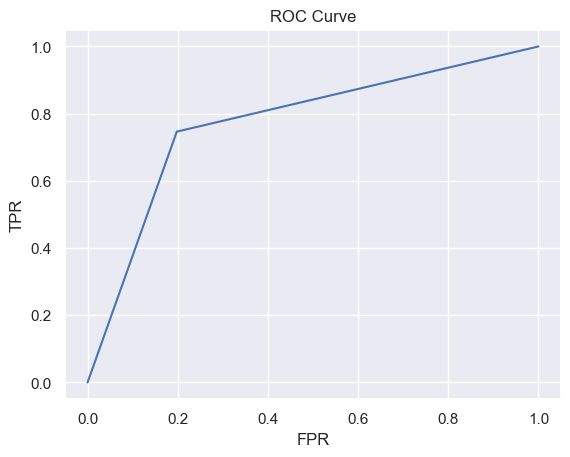

In [10]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [22]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score
def stats_confusion_matrix(model,x_test,y_test):
    predictions = model.predict(x_test)
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.78 accuracy
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       869
           1       0.73      0.75      0.74       631

    accuracy                           0.78      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.78      0.78      0.78      1500



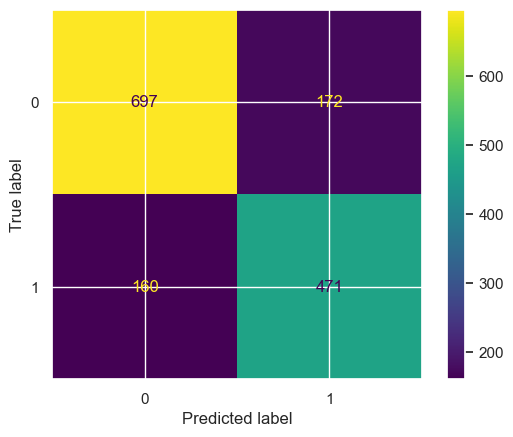

In [23]:
stats_confusion_matrix(model_dt,X_test,y_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
model_rft = RandomForestClassifier(random_state=random)
mode_copy = clone(model_rft)
model_rft.fit(X_train,y_train.values.ravel())

RandomForestClassifier(random_state=2021)

In [14]:
gscv_rfc = GridSearchCV(mode_copy, param_grid, cv=5, scoring='accuracy')
gscv_rfc.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:
predictions_rft = model_rft.predict(X_test)
predictions_gsv = gscv_rfc.predict(X_test)

In [16]:
def print_stats(y_test, predictions):
    print(confusion_matrix(y_test,predictions))
    print(accuracy_score(y_test,predictions))
    print(precision_score(y_test,predictions))
    print(recall_score(y_test,predictions))
    print(roc_auc_score(y_test,predictions))
    print(f1_score(y_test,predictions))
    print(fbeta_score(y_test,predictions,beta=0.25))
    
print_stats(y_test,predictions_rft)
print_stats(y_test,predictions_gsv)

[[713 156]
 [123 508]]
0.814
0.7650602409638554
0.8050713153724247
0.8127773147633125
0.7845559845559845
0.7673034207019102
[[713 156]
 [ 92 539]]
0.8346666666666667
0.7755395683453238
0.8541996830427893
0.8373414985984948
0.8129713423831071
0.7797634243894137


0.81 accuracy
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       869
           1       0.77      0.81      0.78       631

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.82      0.81      0.81      1500



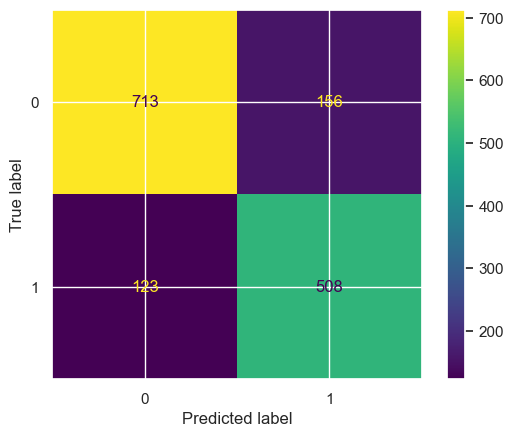

0.83 accuracy
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       869
           1       0.78      0.85      0.81       631

    accuracy                           0.83      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.84      0.83      0.84      1500



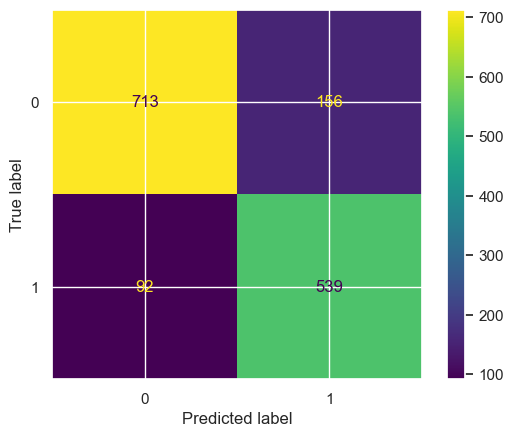

In [17]:
stats_confusion_matrix(model_rft,X_test,y_test)
stats_confusion_matrix(gscv_rfc,X_test,y_test)

In [25]:
%store model_dt
%store model_rft
%store gscv_rfc

Stored 'model_dt' (DecisionTreeClassifier)
Stored 'model_rft' (RandomForestClassifier)
Stored 'gscv_rfc' (GridSearchCV)
